In [13]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10747 entries, 0 to 10746
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   video_id      10747 non-null  object             
 1   author        10747 non-null  object             
 2   channel       10747 non-null  object             
 3   text          10747 non-null  object             
 4   likes         10747 non-null  int64              
 5   reply_count   10747 non-null  int64              
 6   published_at  10747 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 587.9+ KB
Basic Info:
 None
Summary Statistics:
               likes   reply_count
count  10747.000000  10747.000000
mean      10.560529      1.378338
std      198.392642      9.817314
min

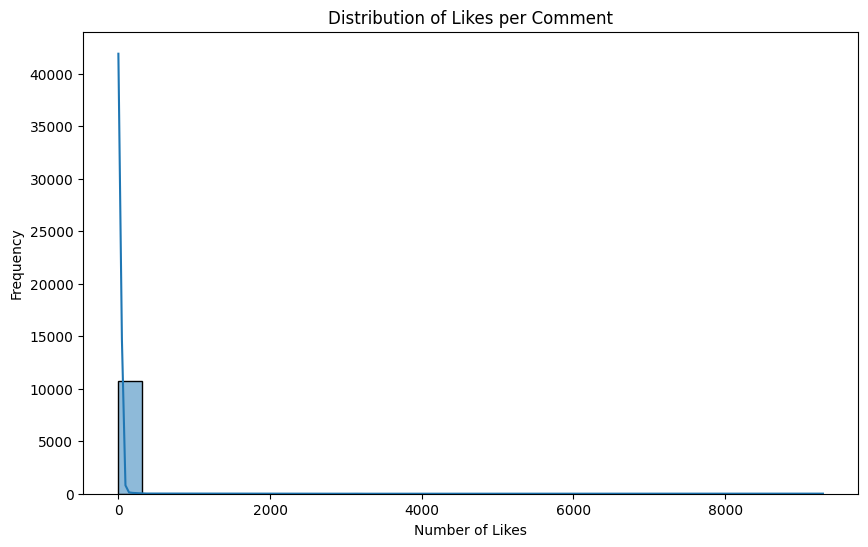

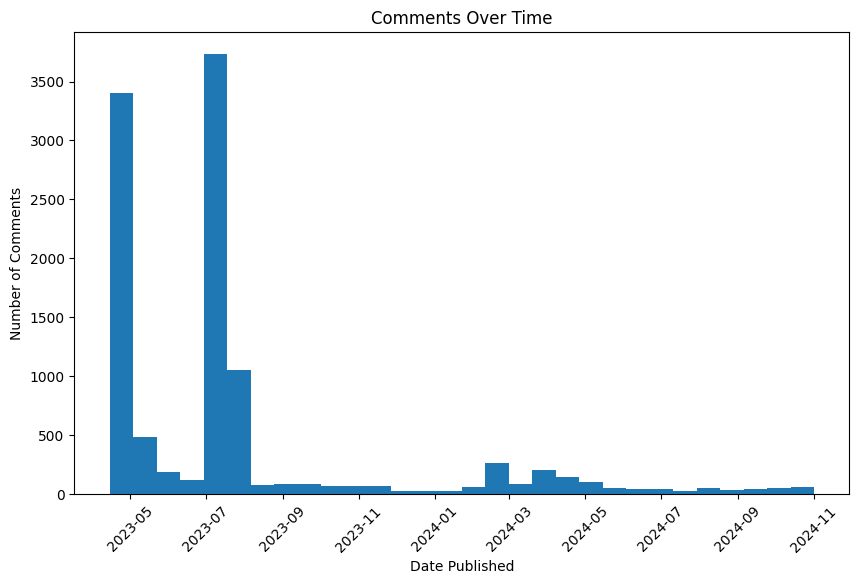

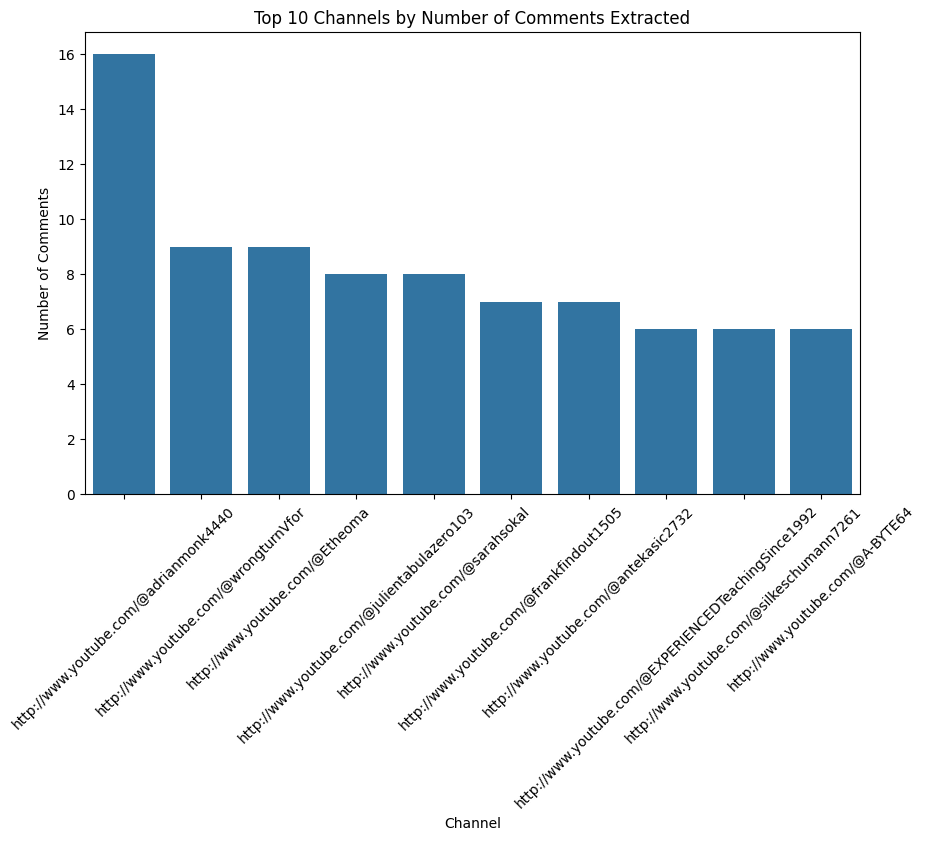

Top 5 Comments with Most Replies and Reactions:
Channel: http://www.youtube.com/@RealEngineering
Author: @RealEngineering
Text: I am once against asking you to watch the entire video before commenting.
Likes: 9289, Replies: 507, Total Interactions: 9796
--------------------------------------------------------------------------------
Channel: http://www.youtube.com/@RealEngineering
Author: @RealEngineering
Text: I am once against asking you to watch the entire video before commenting.
Likes: 9289, Replies: 507, Total Interactions: 9796
--------------------------------------------------------------------------------
Channel: http://www.youtube.com/@baksatibi
Author: @baksatibi
Text: One important note regarding aging nuclear reactors. Before a nuclear reactor start operating the power plant has to get a license from the country&#39;s nuclear regulatory authority to operate it for a fixed number of years, let&#39;s say 20 years. Before this license expires the plant has to make a choice t

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-10-4e93305fb79b>:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['vader_sentiment'] = cleaned_df['cleaned_text'].apply(lambda x: sia.polarit

                                        cleaned_text  vader_sentiment  \
0  fun fact people living within mile radius coal...           0.5106   
1                                         dumb idiot          -0.7650   
2         well thats horrible idea given state thing          -0.3400   
3             guess germany want go back stick stone           0.0772   
4                        germany part destroy planet          -0.5423   

  vader_sentiment_label  
0              Positive  
1              Negative  
2              Negative  
3              Positive  
4              Negative  

Model: Logistic Regression
Classification Report:
               precision    recall  f1-score   support

    Negative       0.73      0.79      0.76       809
     Neutral       0.77      0.54      0.63       382
    Positive       0.77      0.82      0.80       959

    accuracy                           0.76      2150
   macro avg       0.76      0.71      0.73      2150
weighted avg       0.76    

In [10]:
# Step 1: Install necessary packages
!pip install google-api-python-client pandas matplotlib seaborn nltk textblob scikit-learn sqlite3

# Importing necessary libraries
from googleapiclient.discovery import build
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import requests
from io import BytesIO
from zipfile import ZipFile

# Set up YouTube API Key
api_key = '******************************'
youtube = build('youtube', 'v3', developerKey=api_key)

# List of YouTube video IDs (removing duplicates)
video_ids = [
    '8D4kwEgzHc4', 'QSt0aEQH6zs', 'eWuGP_aBoYg', 'KpQdWCitkXI', 'gF9kkB0UWYQ', 'srLzIlKK-6k',
    'iIW3P1sRI7o', 'A8kFVAIrdzY', 'EJ6fOpCc2X8', 'yZVismVO9hk', 'lxKVLmu_ocY', 'y-wjtkNQjec',
    'rxZbol4Dcb0'
]

# Function to get comments from a YouTube video
def get_video_comments(video_id):
    comments = []
    request = youtube.commentThreads().list(
        part='snippet',
        videoId=video_id,
        maxResults=100
    )
    response = request.execute()

    while request:
        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']
            comments.append({
                'video_id': video_id,
                'author': comment['authorDisplayName'],
                'channel': item['snippet']['topLevelComment']['snippet']['authorChannelUrl'],
                'text': comment['textDisplay'],
                'likes': comment['likeCount'],
                'reply_count': item['snippet']['totalReplyCount'],
                'published_at': comment['publishedAt']
            })

        # Pagination for the next batch of comments
        if 'nextPageToken' in response:
            request = youtube.commentThreads().list(
                part='snippet',
                videoId=video_id,
                pageToken=response['nextPageToken'],
                maxResults=100
            )
            response = request.execute()
        else:
            break

    return comments

# Extracting comments from all videos
all_comments = []
for video_id in video_ids:
    all_comments.extend(get_video_comments(video_id))

# Convert list of comments to DataFrame
comments_df = pd.DataFrame(all_comments)
comments_df['author'] = comments_df['author'].astype(str)
comments_df['text'] = comments_df['text'].astype(str)
comments_df['likes'] = pd.to_numeric(comments_df['likes'], errors='coerce').fillna(0).astype(int)
comments_df['reply_count'] = pd.to_numeric(comments_df['reply_count'], errors='coerce').fillna(0).astype(int)
comments_df['published_at'] = pd.to_datetime(comments_df['published_at'], errors='coerce')

# Save comments to SQLite and CSV
def save_to_local(comments_df):
    conn = sqlite3.connect('youtube_comments.db')
    comments_df.to_sql('comments', conn, if_exists='replace', index=False)
    comments_df.to_csv('youtube_comments.csv', index=False, encoding='utf-8')
    conn.close()

save_to_local(comments_df)

# Exploratory Data Analysis (EDA)
print("Basic Info:\n", comments_df.info())
print("Summary Statistics:\n", comments_df.describe())
print("First Few Rows:\n", comments_df.head())

plt.figure(figsize=(10, 6))
sns.histplot(comments_df['likes'], bins=30, kde=True)
plt.title('Distribution of Likes per Comment')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.show()

comments_df['published_at'] = pd.to_datetime(comments_df['published_at'])
plt.figure(figsize=(10, 6))
plt.hist(comments_df['published_at'].dropna(), bins=30)
plt.title('Comments Over Time')
plt.xlabel('Date Published')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.show()

# Showing how many comments we have from each channel
channel_count = comments_df['channel'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=channel_count.index[:10], y=channel_count.values[:10])
plt.title('Top 10 Channels by Number of Comments Extracted')
plt.xlabel('Channel')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.show()

# Top 5 comments with the most replies and reactions
comments_df['total_interactions'] = comments_df['likes'] + comments_df['reply_count']
top_comments = comments_df.sort_values(by='total_interactions', ascending=False).head(5)

print("Top 5 Comments with Most Replies and Reactions:")
for index, row in top_comments.iterrows():
    print(f"Channel: {row['channel']}")
    print(f"Author: {row['author']}")
    print(f"Text: {row['text']}")
    print(f"Likes: {row['likes']}, Replies: {row['reply_count']}, Total Interactions: {row['total_interactions']}")
    print("-" * 80)

# Data Cleaning and Transformation
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')  # Download punkt tokenizer
nltk.download('omw-1.4')  # Download additional resources for WordNet

# Setting up nltk data path to avoid LookupError
nltk.data.path.append('/root/nltk_data')

lemmatizer = WordNetLemmatizer()

def clean_comment(comment):
    # Remove special characters and links
    comment = re.sub(r'http\S+', '', comment)
    comment = re.sub(r'[^a-zA-Z ]', '', comment)

    # Lowercase
    comment = comment.lower()

    # Tokenization and stopword removal
    tokens = nltk.word_tokenize(comment)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

comments_df['cleaned_text'] = comments_df['text'].apply(clean_comment)

# Save cleaned data to SQLite and CSV
def save_cleaned_to_local(cleaned_df):
    conn = sqlite3.connect('youtube_cleaned_comments.db')
    cleaned_df.to_sql('cleaned_comments', conn, if_exists='replace', index=False)
    cleaned_df.to_csv('cleaned_youtube_comments.csv', index=False, encoding='utf-8')
    conn.close()

cleaned_df = comments_df[['video_id', 'author', 'channel', 'cleaned_text', 'likes', 'reply_count', 'published_at']]
save_cleaned_to_local(cleaned_df)

# VADER Sentiment Analysis
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis to the cleaned comments
cleaned_df['vader_sentiment'] = cleaned_df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment based on VADER compound score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply classification
cleaned_df['vader_sentiment_label'] = cleaned_df['vader_sentiment'].apply(classify_sentiment)

# Save final data with sentiment to SQLite and CSV
def save_sentiment_to_local(sentiment_df):
    conn = sqlite3.connect('youtube_sentiment_comments.db')
    sentiment_df.to_sql('sentiment_comments', conn, if_exists='replace', index=False)
    sentiment_df.to_csv('youtube_sentiment_comments.csv', index=False, encoding='utf-8')
    conn.close()

save_sentiment_to_local(cleaned_df)

# Display the final dataframe with VADER sentiment results
print(cleaned_df[['cleaned_text', 'vader_sentiment', 'vader_sentiment_label']].head())

# Train NLP Models for Sentiment Analysis
X = cleaned_df['cleaned_text']
y = cleaned_df['vader_sentiment_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear'),
    'Naive Bayes': MultinomialNB()
}

# Train and evaluate models
results = []
for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({
        'Model': model_name,
        'Classification Report': report,
        'Confusion Matrix': confusion_matrix(y_test, y_pred).tolist(),
        'Accuracy Score': accuracy
    })
    print(f"\nModel: {model_name}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", accuracy)

# Save model results to a DataFrame and CSV
results_df = pd.DataFrame(results)
results_df.to_csv('model_results.csv', index=False)

print("\nModel Evaluation Results saved to 'model_results.csv'")


<ipython-input-11-1ac3991b5fa1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vader_sentiment_label', data=cleaned_df, palette='viridis')


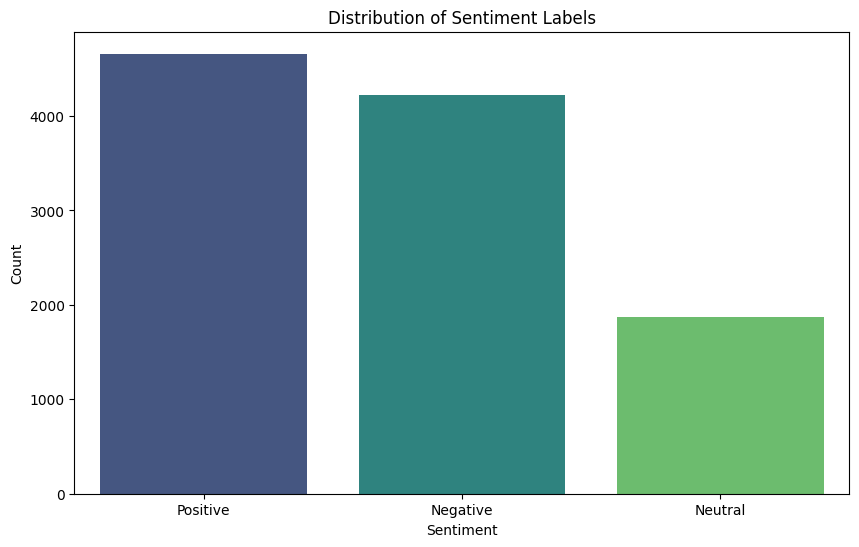

In [11]:
# Sentiment Distribution Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='vader_sentiment_label', data=cleaned_df, palette='viridis')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [12]:
import os

files = ['youtube_comments.csv', 'youtube_cleaned_comments.csv', 'youtube_sentiment_comments.csv', 'model_results.csv']
for file in files:
    path = f'/content/drive/My Drive/{file}'
    if os.path.exists(path):
        print(f"{file} is saved in Google Drive.")
    else:
        print(f"{file} is not found in Google Drive.")

youtube_comments.csv is not found in Google Drive.
youtube_cleaned_comments.csv is not found in Google Drive.
youtube_sentiment_comments.csv is not found in Google Drive.
model_results.csv is not found in Google Drive.


In [14]:
# Save comments to SQLite and CSV
def save_to_drive(df, db_name, csv_name):
    conn = sqlite3.connect(f'/content/drive/My Drive/{db_name}')
    df.to_sql(csv_name.split('.')[0], conn, if_exists='replace', index=False)
    df.to_csv(f'/content/drive/My Drive/{csv_name}', index=False, encoding='utf-8')
    conn.close()

# Save all files again
save_to_drive(comments_df, 'youtube_comments.db', 'youtube_comments.csv')
save_to_drive(cleaned_df, 'youtube_cleaned_comments.db', 'youtube_cleaned_comments.csv')
save_to_drive(cleaned_df, 'youtube_sentiment_comments.db', 'youtube_sentiment_comments.csv')
results_df.to_csv('/content/drive/My Drive/model_results.csv', index=False)


In [15]:
def get_video_details(video_id):
    request = youtube.videos().list(
        part='snippet',
        id=video_id
    )
    response = request.execute()
    if 'items' in response and len(response['items']) > 0:
        item = response['items'][0]['snippet']
        return {
            'title': item['title'],
            'description': item['description'],
            'channel_title': item['channelTitle']
        }
    return {}

# Extract video details for each video ID
video_details = []
for video_id in video_ids:
    details = get_video_details(video_id)
    if details:
        video_details.append(details)

# Convert video details to a DataFrame for analysis
video_details_df = pd.DataFrame(video_details)
print(video_details_df.head())


                                               title  \
0  Germany ends nuclear energy era as last reacto...   
1     Germany’s Staggeringly Stupid Nuclear Closures   
2               Is Germany's nuclear exit a mistake?   
3  Why has Germany shut down its nuclear plants? ...   
4                    Why Germany Hates Nuclear Power   

                                         description       channel_title  
0  Germany has shut down its last three nuclear p...  Al Jazeera English  
1  #germany #nuclear #nuclearenergy #renewables #...        Robert Bryce  
2  The 15th of April 2023 marks the end of German...         DW Planet A  
3  After years of contentious debates, Germany ha...  Al Jazeera English  
4  Sign up to Brilliant using my link and get 20%...    Real Engineering  


In [18]:
# Extract a few examples of positive, negative, and neutral comments
positive_comments = cleaned_df[cleaned_df['vader_sentiment_label'] == 'Positive'].sample(3)
negative_comments = cleaned_df[cleaned_df['vader_sentiment_label'] == 'Negative'].sample(3)
neutral_comments = cleaned_df[cleaned_df['vader_sentiment_label'] == 'Neutral'].sample(3)

# Display the selected comments
print("\nPositive Comments:")
for index, row in positive_comments.iterrows():
    print(f"Author: {row['author']}")
    print(f"Comment: {row['cleaned_text']}")
    print("-" * 50)

print("\nNegative Comments:")
for index, row in negative_comments.iterrows():
    print(f"Author: {row['author']}")
    print(f"Comment: {row['cleaned_text']}")
    print("-" * 50)

print("\nNeutral Comments:")
for index, row in neutral_comments.iterrows():
    print(f"Author: {row['author']}")
    print(f"Comment: {row['cleaned_text']}")
    print("-" * 50)



Positive Comments:
Author: @edobatt1794
Comment: know germany like italy unlike france former colony africa import uranium convenient price
--------------------------------------------------
Author: @LeeAtkinson98
Comment: yeah antinuclear power mob reptile brain fool people suck judging risk let alone people barely topical knowledge glad france right track hope yet doubt others follow smrs improved design always help making worth renewables get cheaper industrial scale battery
--------------------------------------------------
Author: @BlackWater_49
Comment: href get stats frombrbrin energy mix came hard coal brown coal make
--------------------------------------------------

Negative Comments:
Author: @lukasrgl
Comment: stupid word old coal powerplants ddr reactivatet time phasing nuclear power quotgood environmentquot btw come someone life right km away isar
--------------------------------------------------
Author: @dullyvampir83
Comment: nuclear reactor scam insurance world willi

<ipython-input-19-b8eaee854d47>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


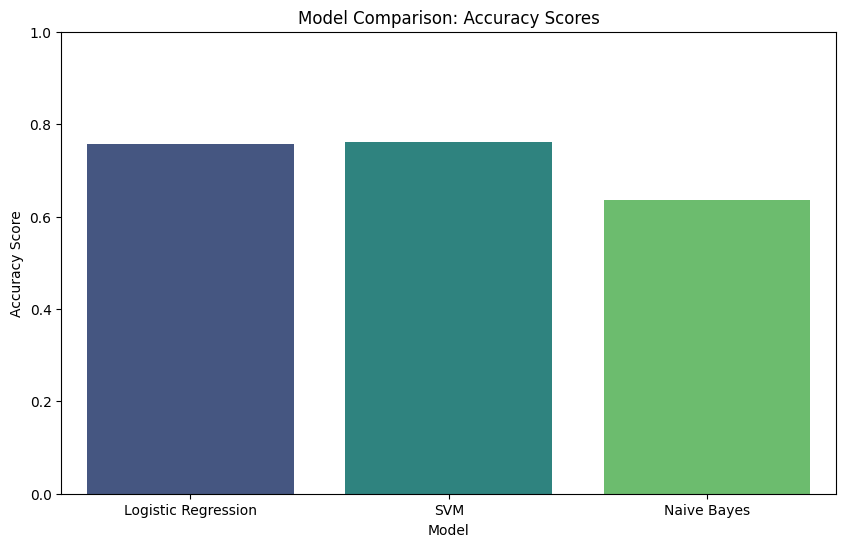

In [19]:
# Extract accuracy scores for each model from the results
model_names = [result['Model'] for result in results]
accuracies = [result['Accuracy Score'] for result in results]

# Plotting the accuracy scores of each model
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Comparison: Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for better visualization
plt.show()
